# Pymaceuticals Inc.
---

### Analysis

- Add your analysis here.
 

In [31]:
# Dependencies and Setup
import matplotlib.pyplot as plt
import pandas as pd
import scipy.stats as st

# Study data files
mouse_metadata_path = "data/Mouse_metadata.csv"
study_results_path = "data/Study_results.csv"

# Read the mouse data and the study results
mouse_metadata = pd.read_csv(mouse_metadata_path)
study_results = pd.read_csv(study_results_path)

# Combine the data into a single DataFrame
merged_df = pd.merge(mouse_metadata,study_results,on="Mouse ID")

# Display the data table for preview
merged_df


,Mouse ID,Drug Regimen,Sex,Age_months,Weight (g),Timepoint,Tumor Volume (mm3),Metastatic Sites
0,k403,Ramicane,Male,21,16,0,45.000000,0
1,k403,Ramicane,Male,21,16,5,38.825898,0
2,k403,Ramicane,Male,21,16,10,35.014271,1
3,k403,Ramicane,Male,21,16,15,34.223992,1
4,k403,Ramicane,Male,21,16,20,32.997729,1
...,...,...,...,...,...,...,...,...
1888,z969,Naftisol,Male,9,30,25,63.145652,2
1889,z969,Naftisol,Male,9,30,30,65.841013,3
1890,z969,Naftisol,Male,9,30,35,69.176246,4
1891,z969,Naftisol,Male,9,30,40,70.314904,4


In [32]:
# Checking the number of mice.
mouse_metadata.shape[0]

249

In [33]:
# Our data should be uniquely identified by Mouse ID and Timepoint
# Get the duplicate mice by ID number that shows up for Mouse ID and Timepoint. 
merged_df[merged_df.duplicated(['Mouse ID', 'Timepoint'])]['Mouse ID'].unique()


array(['g989'], dtype=object)

In [34]:
# Optional: Get all the data for the duplicate mouse ID. 
merged_df[merged_df['Mouse ID']=='g989']

,Mouse ID,Drug Regimen,Sex,Age_months,Weight (g),Timepoint,Tumor Volume (mm3),Metastatic Sites
908,g989,Propriva,Female,21,26,0,45.000000,0
909,g989,Propriva,Female,21,26,0,45.000000,0
910,g989,Propriva,Female,21,26,5,48.786801,0
911,g989,Propriva,Female,21,26,5,47.570392,0
912,g989,Propriva,Female,21,26,10,51.745156,0
913,g989,Propriva,Female,21,26,10,49.880528,0
914,g989,Propriva,Female,21,26,15,51.325852,1
915,g989,Propriva,Female,21,26,15,53.442020,0
916,g989,Propriva,Female,21,26,20,55.326122,1
917,g989,Propriva,Female,21,26,20,54.657650,1


In [35]:
# Create a clean DataFrame by dropping the duplicate mouse by its ID.
clean_df = merged_df[merged_df['Mouse ID']!='g989']

In [36]:
# Checking the number of mice in the clean DataFrame.
clean_df['Mouse ID'].unique().shape[0]


248

## Summary Statistics

In [37]:
# Generate a summary statistics table of mean, median, variance, standard deviation, and SEM of the tumor volume for each regimen

# Use groupby and summary statistical methods to calculate the following properties of each drug regimen: 
# mean, median, variance, standard deviation, and SEM of the tumor volume. 
# Assemble the resulting series into a single summary DataFrame.

clean_df_avg = clean_df.groupby('Drug Regimen')['Tumor Volume (mm3)'].mean()
clean_df_median = clean_df.groupby('Drug Regimen')['Tumor Volume (mm3)'].median()
clean_df_var = clean_df.groupby('Drug Regimen')['Tumor Volume (mm3)'].var()
clean_df_std = clean_df.groupby('Drug Regimen')['Tumor Volume (mm3)'].std()
clean_df_sem = clean_df.groupby('Drug Regimen')['Tumor Volume (mm3)'].sem()

stats_summary_df = pd.concat([
    clean_df_avg, clean_df_median, clean_df_var, clean_df_std, clean_df_sem
], axis=1)

stats_summary_df
stats_summary_df.columns = ['Average Tumor Volume', 'Median Tumor Volume', 'Tumor Volume Variance', 'Tumor Volume Standard Deviation', 'Standard Error']
stats_summary_df

,Average Tumor Volume,Median Tumor Volume,Tumor Volume Variance,Tumor Volume Standard Deviation,Standard Error
Drug Regimen,,,,,
Capomulin,40.675741,41.557809,24.947764,4.994774,0.329346
Ceftamin,52.591172,51.776157,39.290177,6.268188,0.469821
Infubinol,52.884795,51.820584,43.128684,6.567243,0.492236
Ketapril,55.235638,53.698743,68.553577,8.279709,0.603860
Naftisol,54.331565,52.509285,66.173479,8.134708,0.596466
Placebo,54.033581,52.288934,61.168083,7.821003,0.581331
Propriva,52.320930,50.446266,43.852013,6.622085,0.544332
Ramicane,40.216745,40.673236,23.486704,4.846308,0.320955
Stelasyn,54.233149,52.431737,59.450562,7.710419,0.573111


In [38]:
# A more advanced method to generate a summary statistics table of mean, median, variance, standard deviation,
# and SEM of the tumor volume for each regimen (only one method is required in the solution)

# Using the aggregation method, produce the same summary statistics in a single line
agg_df = clean_df.groupby('Drug Regimen')['Tumor Volume (mm3)'].agg(['mean', 'median', 'var', 'std', 'sem'])
agg_df.columns = ['Average Tumor Volume', 'Median Tumor Volume','Tumor Volume Variance', 'Tumor Volume Standard Deviation', 'Standard Error']
agg_df


,Average Tumor Volume,Median Tumor Volume,Tumor Volume Variance,Tumor Volume Standard Deviation,Standard Error
Drug Regimen,,,,,
Capomulin,40.675741,41.557809,24.947764,4.994774,0.329346
Ceftamin,52.591172,51.776157,39.290177,6.268188,0.469821
Infubinol,52.884795,51.820584,43.128684,6.567243,0.492236
Ketapril,55.235638,53.698743,68.553577,8.279709,0.603860
Naftisol,54.331565,52.509285,66.173479,8.134708,0.596466
Placebo,54.033581,52.288934,61.168083,7.821003,0.581331
Propriva,52.320930,50.446266,43.852013,6.622085,0.544332
Ramicane,40.216745,40.673236,23.486704,4.846308,0.320955
Stelasyn,54.233149,52.431737,59.450562,7.710419,0.573111


## Bar and Pie Charts

<AxesSubplot:xlabel='Drug Regimen', ylabel='Count'>

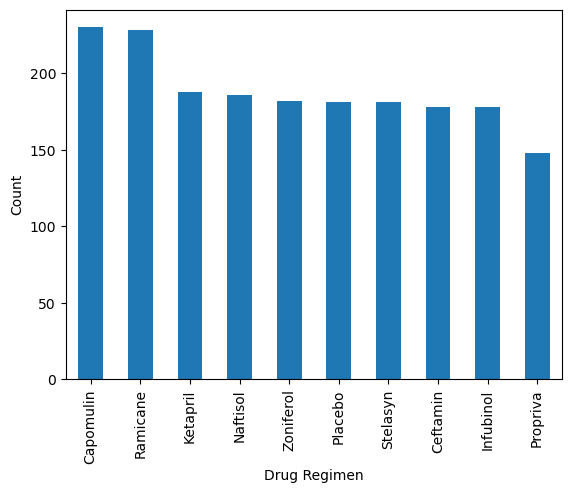

In [39]:
# Generate a bar plot showing the total number of rows (Mouse ID/Timepoints) for each drug regimen using Pandas.
clean_df.groupby(['Drug Regimen'])["Mouse ID"].count().sort_values(ascending=False).plot.bar(ylabel='Count')


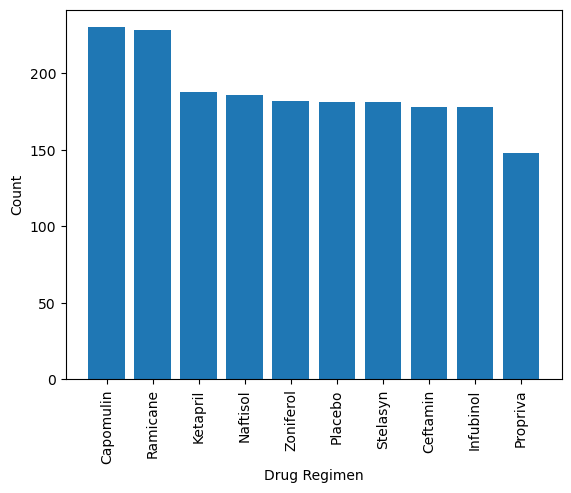

In [40]:
# Generate a bar plot showing the total number of rows (Mouse ID/Timepoints) for each drug regimen using pyplot.
data = clean_df.groupby(['Drug Regimen'])["Mouse ID"].count().sort_values(ascending=False)
x = data.index
y = data.values

plt.bar(x,y)
plt.xticks(rotation = 90)
plt.xlabel('Drug Regimen')
plt.ylabel('Count');

In [41]:
# Generate a pie plot showing the distribution of female versus male mice using Pandas



In [42]:
# Generate a pie plot showing the distribution of female versus male mice using pyplot
#Create x and y, then plot

## Quartiles, Outliers and Boxplots

In [43]:
# Calculate the final tumor volume of each mouse across four of the treatment regimens:  
# Capomulin, Ramicane, Infubinol, and Ceftamin

# Start by getting the last (greatest) timepoint for each mouse
max_timepoints = clean_df.groupby(['Mouse ID'])['Timepoint'].max().to_frame()
max_timepoints = max_timepoints.reset_index()
max_timepoints

# Merge this group df with the original DataFrame to get the tumor volume at the last timepoint
max_timepoints_df = max_timepoints.merge(clean_df, on=['Mouse ID', 'Timepoint'])
final_volume = clean_df.groupby(['Drug Regimen'])['Tumor Volume (mm3)'].sum()
final_volume


Drug Regimen
Capomulin     9355.420462
Ceftamin      9361.228582
Infubinol     9413.493529
Ketapril     10384.299876
Naftisol     10105.671026
Placebo       9780.078122
Propriva      7743.497619
Ramicane      9169.417875
Stelasyn      9816.199991
Zoniferol     9689.044192
Name: Tumor Volume (mm3), dtype: float64

In [44]:
max_timepoints_df

,Mouse ID,Timepoint,Drug Regimen,Sex,Age_months,Weight (g),Tumor Volume (mm3),Metastatic Sites
0,a203,45,Infubinol,Female,20,23,67.973419,2
1,a251,45,Infubinol,Female,21,25,65.525743,1
2,a262,45,Placebo,Female,17,29,70.717621,4
3,a275,45,Ceftamin,Female,20,28,62.999356,3
4,a366,30,Stelasyn,Female,16,29,63.440686,1
...,...,...,...,...,...,...,...,...
243,z435,10,Propriva,Female,12,26,48.710661,0
244,z578,45,Ramicane,Male,11,16,30.638696,0
245,z581,45,Infubinol,Female,24,25,62.754451,3
246,z795,45,Naftisol,Female,13,29,65.741070,3


In [75]:
# Put treatments into a list for for loop (and later for plot labels)
treatments = ['Infubinol', 'Capomulin', 'Ramicane', 'Ceftamin']

# Create empty list to fill with tumor vol data (for plotting)
data = []

# Calculate the IQR and quantitatively determine if there are any potential outliers. 
for treatment in treatments:


    # Locate the rows which contain mice on each drug and get the tumor volumes
    volume = max_timepoints_df.loc[max_timepoints_df['Drug Regimen'] == treatment, ['Tumor Volume (mm3)']]
    
    # add subset 
    data.append(volume['Tumor Volume (mm3)'])
    
    # Determine outliers using upper and lower bounds
    quartiles = volume.quantile([0.25, 0.5, 0.75])
    
    u = quartiles.loc[0.75, 'Tumor Volume (mm3)'] 
    l = quartiles.loc[0.25, 'Tumor Volume (mm3)']
    iqr = u - l 
    upper_limit = u + iqr * 1.5 
    lower_limit = l - iqr * 1.5
    outliers = volume[(volume['Tumor Volume (mm3)']>upper_limit) | (volume['Tumor Volume (mm3)']<lower_limit)]
    if not outliers.empty:
        print(f"There are outliers in treatment {treatment}") 
    


There are outliers in treatment Infubinol


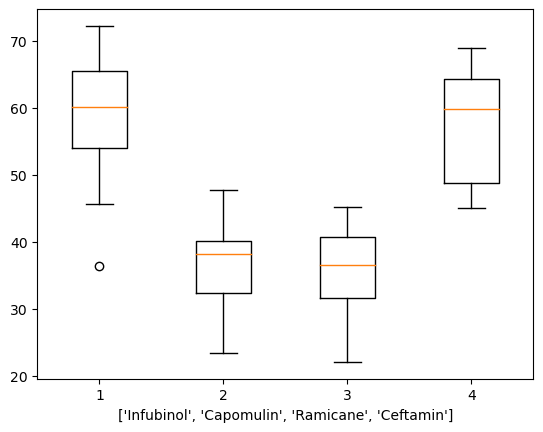

In [84]:
# Generate a box plot that shows the distrubution of the tumor volume for each treatment group.
plt.boxplot(data);
plt.xlabel(treatments)

## Line and Scatter Plots

Text(0, 0.5, 'Tumor Volume')

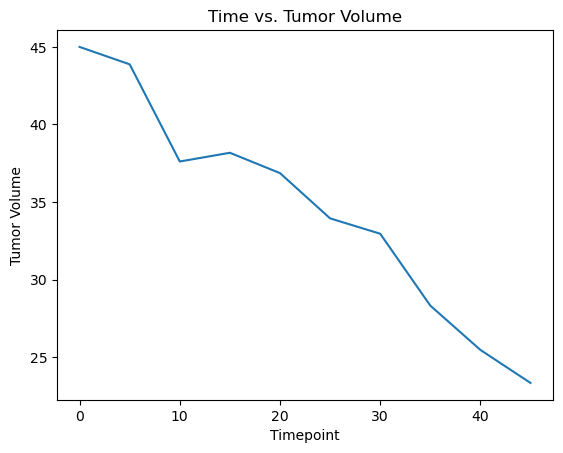

In [97]:
# Generate a line plot of tumor volume vs. time point for a single mouse treated with Capomulin
sing_cap_mouse = clean_df[clean_df['Drug Regimen'] == 'Capomulin'].iloc[0]['Mouse ID']
sing_cap_mouse
sing_cap_mouse = clean_df[clean_df['Mouse ID'] == sing_cap_mouse][['Timepoint', 'Tumor Volume (mm3)']]
x = sing_cap_mouse['Timepoint']
y = sing_cap_mouse['Tumor Volume (mm3)']
plt.plot(x,y)
plt.title('Time vs. Tumor Volume')
plt.xlabel('Timepoint')
plt.ylabel('Tumor Volume')


In [48]:
# Generate a scatter plot of mouse weight vs. the average observed tumor volume for the entire Capomulin regimen


## Correlation and Regression

In [49]:
# Calculate the correlation coefficient and a linear regression model 
# for mouse weight and average observed tumor volume for the entire Capomulin regimen
